In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

df = pd.read_csv("data/universal_top_spotify_songs.csv")


In [22]:
drop_cols = ['artists','album_name','album_release_date','spotify_id']

df = df.drop(columns=drop_cols)
df

,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Ordinary,1,1,0,NaN,2025-06-11,95,False,186964,0.368,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,Manchild,2,-1,48,NaN,2025-06-11,89,True,213645,0.731,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,back to friends,3,0,1,NaN,2025-06-11,98,False,199032,0.436,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,Die With A Smile,4,0,-1,NaN,2025-06-11,91,False,251667,0.519,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,BIRDS OF A FEATHER,5,1,0,NaN,2025-06-11,100,False,210373,0.747,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110311,Slime You Out (feat. SZA),46,4,0,AE,2023-10-18,84,True,310490,0.483,...,5,-9.243,0,0.0502,0.508000,0.000000,0.2590,0.105,88.880,3
2110312,SAY MY GRACE (feat. Travis Scott),47,3,0,AE,2023-10-18,80,True,173253,0.773,...,10,-5.060,1,0.0452,0.058500,0.000000,0.1320,0.476,121.879,4
2110313,People,48,2,0,AE,2023-10-18,88,False,184791,0.573,...,10,-7.621,0,0.0678,0.551000,0.000013,0.1020,0.693,124.357,5
2110314,Rainy Days,49,1,0,AE,2023-10-18,88,False,179560,0.633,...,9,-8.016,0,0.0875,0.739000,0.000000,0.1480,0.282,74.828,4


In [3]:
# 날짜 필터링: 2024-01-01 ~ 2024-12-31
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
df = df[(df['snapshot_date'] >= "2024-01-01") & (df['snapshot_date'] <= "2024-12-31")]
df

,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
554811,Die With A Smile,1,0,3,NaN,2024-12-31,99,False,251667,0.521,...,6,-7.777,0,0.0304,0.30800,0.000000,0.122,0.535,157.969,3
554812,APT.,2,0,4,NaN,2024-12-31,87,False,169917,0.777,...,0,-4.477,0,0.2600,0.02830,0.000000,0.355,0.939,149.027,4
554813,That’s So True,3,0,8,NaN,2024-12-31,95,True,166300,0.554,...,1,-4.169,1,0.0368,0.21400,0.000000,0.159,0.372,108.548,4
554814,BIRDS OF A FEATHER,4,0,8,NaN,2024-12-31,97,False,210373,0.747,...,2,-10.171,1,0.0358,0.20000,0.060800,0.117,0.438,104.978,4
554815,Who,5,0,13,NaN,2024-12-31,91,False,170887,0.660,...,0,-3.743,0,0.0320,0.00289,0.000000,0.193,0.838,116.034,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837036,One Dance,46,-4,4,AE,2024-01-01,87,False,173986,0.792,...,1,-5.609,1,0.0536,0.00776,0.001800,0.329,0.370,103.967,4
1837037,Daylight,47,2,3,AE,2024-01-01,92,False,212953,0.508,...,2,-9.475,0,0.0335,0.83000,0.000441,0.093,0.324,130.090,4
1837038,Saari Duniya Jalaa Denge,48,2,-3,AE,2024-01-01,85,False,182348,0.515,...,0,-9.661,1,0.0351,0.78200,0.000000,0.164,0.674,81.835,4
1837039,Rich Baby Daddy (feat. Sexyy Red & SZA),49,1,1,AE,2024-01-01,87,True,319191,0.645,...,2,-4.560,1,0.0528,0.03770,0.000000,0.384,0.142,146.010,4


In [4]:
# 국가 null확인
df[df['country'].isnull()]

,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
554811,Die With A Smile,1,0,3,NaN,2024-12-31,99,False,251667,0.521,...,6,-7.777,0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,3
554812,APT.,2,0,4,NaN,2024-12-31,87,False,169917,0.777,...,0,-4.477,0,0.2600,0.02830,0.000000,0.3550,0.939,149.027,4
554813,That’s So True,3,0,8,NaN,2024-12-31,95,True,166300,0.554,...,1,-4.169,1,0.0368,0.21400,0.000000,0.1590,0.372,108.548,4
554814,BIRDS OF A FEATHER,4,0,8,NaN,2024-12-31,97,False,210373,0.747,...,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,4
554815,Who,5,0,13,NaN,2024-12-31,91,False,170887,0.660,...,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833436,3D (feat. Jack Harlow),46,2,4,NaN,2024-01-01,84,True,201812,0.853,...,1,-3.287,1,0.1030,0.03220,0.000000,0.0859,0.888,108.044,4
1833437,fukumean,47,0,3,NaN,2024-01-01,90,True,125040,0.847,...,1,-6.747,0,0.0903,0.11900,0.000000,0.2850,0.220,130.001,4
1833438,DEJA VU,48,2,2,NaN,2024-01-01,85,False,199827,0.572,...,8,-6.028,1,0.0596,0.19500,0.000000,0.0897,0.468,141.935,4
1833439,Blinding Lights,49,-3,1,NaN,2024-01-01,90,False,200040,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4


In [5]:
# 국가 null 제거
df=df.dropna(subset=['country'])
df

,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
554861,"Biri Marung (feat. Sje Konka, Focalistic, DJ M...",1,0,0,ZA,2024-12-31,70,False,454778,0.848,...,9,-10.935,1,0.0532,0.00115,0.004850,0.0523,0.301,113.002,4
554862,Wishi Wishi (feat. Scotts Maphuma & Young Stunna),2,1,1,ZA,2024-12-31,66,False,381428,0.861,...,1,-12.417,1,0.0727,0.06320,0.000078,0.2530,0.413,112.009,4
554863,Sdakiwe Sbali (feat. Bless The Gentleman & DJ ...,3,-1,-1,ZA,2024-12-31,65,False,245740,0.937,...,6,-6.094,0,0.0424,0.00877,0.000000,0.0608,0.753,114.043,4
554864,Shayi'Moto (feat. Seemah & Yanda Woods),4,0,0,ZA,2024-12-31,64,False,445719,0.853,...,1,-10.387,0,0.0565,0.02750,0.017500,0.0908,0.513,112.002,4
554865,Waze Wamuhle (feat. Mashudu),5,1,4,ZA,2024-12-31,60,False,578932,0.814,...,1,-9.547,0,0.0519,0.00887,0.260000,0.0410,0.624,113.009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837036,One Dance,46,-4,4,AE,2024-01-01,87,False,173986,0.792,...,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,4
1837037,Daylight,47,2,3,AE,2024-01-01,92,False,212953,0.508,...,2,-9.475,0,0.0335,0.83000,0.000441,0.0930,0.324,130.090,4
1837038,Saari Duniya Jalaa Denge,48,2,-3,AE,2024-01-01,85,False,182348,0.515,...,0,-9.661,1,0.0351,0.78200,0.000000,0.1640,0.674,81.835,4
1837039,Rich Baby Daddy (feat. Sexyy Red & SZA),49,1,1,AE,2024-01-01,87,True,319191,0.645,...,2,-4.560,1,0.0528,0.03770,0.000000,0.3840,0.142,146.010,4


In [23]:
# 국가종류 확인
all_countries = df['country'].unique()

print("데이터셋에 포함된 모든 국가 코드:")
print(all_countries)

데이터셋에 포함된 모든 국가 코드:
[nan 'ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE' 'SA'
 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG' 'MY'
 'MX' 'MA' 'LV' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE' 'ID'
 'HU' 'HN' 'HK' 'GT' 'GR' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DO' 'DK' 'DE'
 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT' 'AR'
 'AE' 'GB']


In [24]:
continent_map = {
    'Asia': [
        'AE','IL','IN','ID','JP','KR','KZ','MY','PH','SG','TH','TW','VN','HK','SA','TR'
    ],
    'Europe': [
        'AT','BE','BG','BY','CH','CZ','DE','DK','EE','ES','FI','FR','GR','HU','IE','IS',
        'IT','LT','LU','LV','NL','NO','PL','PT','RO','SE','SK','UA','GB'
    ],
    'North America': [
        'CA','CR','DO','GT','HN','MX','NI','PA','SV','US'
    ],
    'South America': [
        'AR','BO','BR','CL','CO','EC','PE','PY','UY','VE'
    ],
    'Africa': ['EG','MA','NG','ZA'],
    'Oceania': ['AU','NZ'],
    'Global': ['GLOBAL']
}

In [25]:
def get_continent(code):
    for continent, countries in continent_map.items():
        if code in countries:
            return continent
    return 'Unknown'

In [26]:
df['continent'] = df['country'].apply(get_continent)

In [27]:
from sklearn.model_selection import train_test_split

features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness','valence','tempo'
]
X = df[features]
y = df['continent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         
    random_state=42,        
    stratify=y             
)

print("학습용 데이터:", X_train.shape)
print("테스트용 데이터:", X_test.shape)
print("\n대륙 비율 확인:")
print("Train:\n", y_train.value_counts(normalize=True).round(3))
print("\nTest:\n", y_test.value_counts(normalize=True).round(3))

학습용 데이터: (1688252, 9)
테스트용 데이터: (422064, 9)

대륙 비율 확인:
Train:
 continent
Europe           0.395
Asia             0.220
North America    0.138
South America    0.137
Africa           0.055
Unknown          0.028
Oceania          0.027
Name: proportion, dtype: float64

Test:
 continent
Europe           0.395
Asia             0.220
North America    0.138
South America    0.137
Africa           0.055
Unknown          0.028
Oceania          0.027
Name: proportion, dtype: float64


In [28]:

depths = list(range(1, 31))
train_acc, test_acc, train_f1, test_f1 = [], [], [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    ytr = dt.predict(X_train)
    yte = dt.predict(X_test)
    train_acc.append(accuracy_score(y_train, ytr))
    test_acc.append(accuracy_score(y_test, yte))
    train_f1.append(f1_score(y_train, ytr, average='macro'))
    test_f1.append(f1_score(y_test, yte, average='macro'))

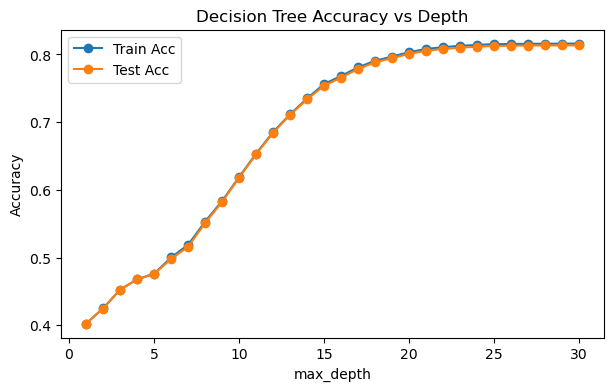

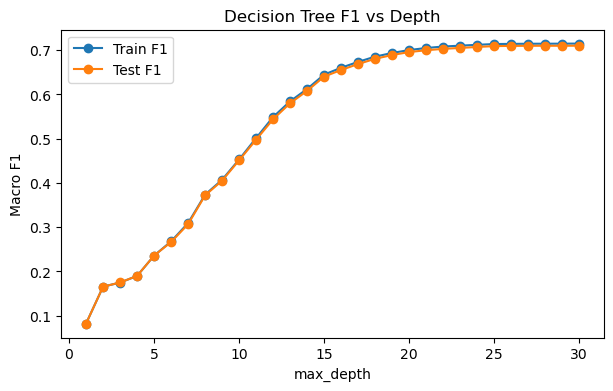

In [12]:

plt.figure(figsize=(7,4))
plt.plot(depths, train_acc, '-o', label='Train Acc')
plt.plot(depths, test_acc, '-o', label='Test Acc')
plt.xlabel('max_depth'); plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth')
plt.legend(); plt.show()

plt.figure(figsize=(7,4))
plt.plot(depths, train_f1, '-o', label='Train F1')
plt.plot(depths, test_f1, '-o', label='Test F1')
plt.xlabel('max_depth'); plt.ylabel('Macro F1')
plt.title('Decision Tree F1 vs Depth')
plt.legend(); plt.show()

In [16]:

best_depth = depths[int(np.argmax(test_f1))]
print(f"\n 최적 깊이 (max_depth) = {best_depth}")


 최적 깊이 (max_depth) = 30


In [14]:

dt_final = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
dt_final.fit(X_train, y_train)
y_pred_dt = dt_final.predict(X_test)

print("\n [Decision Tree 최종 모델]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"Macro F1: {f1_score(y_test, y_pred_dt, average='macro'):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🌳 [Decision Tree 최종 모델]
Accuracy: 0.813
Macro F1: 0.710

Classification Report:
                precision    recall  f1-score   support

       Africa       0.98      0.88      0.93     14057
         Asia       0.88      0.83      0.86     56330
       Europe       0.81      0.94      0.87    101796
North America       0.73      0.58      0.65     35308
      Oceania       0.61      0.11      0.19      7004
South America       0.74      0.76      0.75     34910
      Unknown       0.77      0.68      0.72      3541

     accuracy                           0.81    252946
    macro avg       0.79      0.69      0.71    252946
 weighted avg       0.81      0.81      0.80    252946



In [18]:

rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=best_depth)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n [Random Forest]")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Macro F1: {f1_score(y_test, y_pred_rf, average='macro'):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 [Random Forest]
Accuracy: 0.814
Macro F1: 0.710

Classification Report:
                precision    recall  f1-score   support

       Africa       0.98      0.88      0.93     14057
         Asia       0.89      0.83      0.86     56330
       Europe       0.81      0.95      0.87    101796
North America       0.73      0.58      0.65     35308
      Oceania       0.61      0.11      0.19      7004
South America       0.74      0.76      0.75     34910
      Unknown       0.77      0.68      0.72      3541

     accuracy                           0.81    252946
    macro avg       0.79      0.69      0.71    252946
 weighted avg       0.81      0.81      0.80    252946



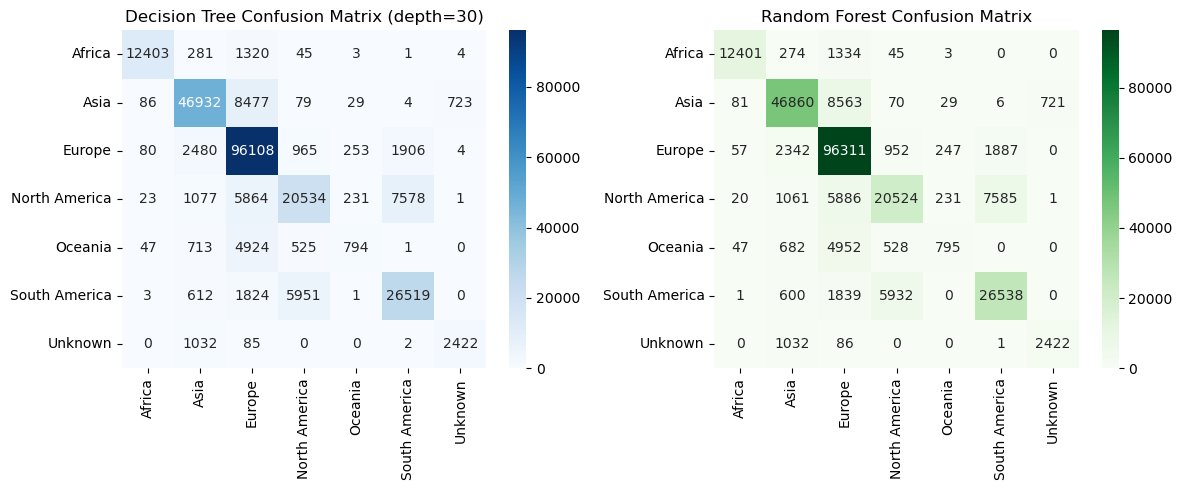

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[0])
axes[0].set_title(f"Decision Tree Confusion Matrix (depth={best_depth})")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

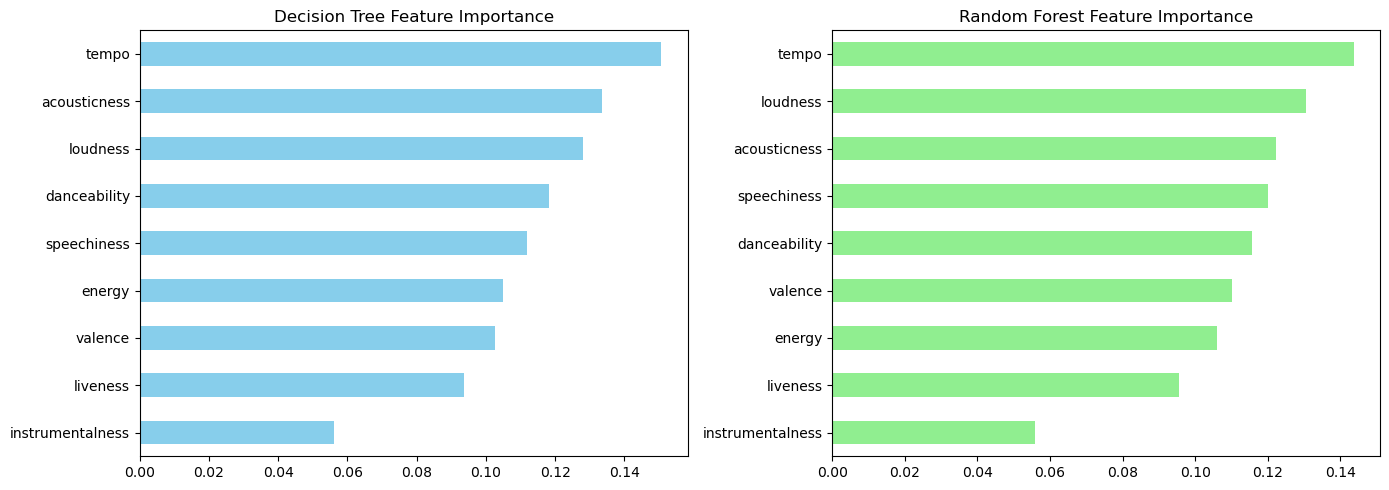

In [20]:

fi_dt = pd.Series(dt_final.feature_importances_, index=X.columns)
fi_rf = pd.Series(rf.feature_importances_, index=X.columns)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
fi_dt.sort_values().plot(kind='barh', ax=axes[0], color='skyblue', title='Decision Tree Feature Importance')
fi_rf.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen', title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()